In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STYLE SETTINGS: Make the charts look professional
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # Show all 122 columns, don't hide the middle ones

# LOAD DATA
print("Loading data...")
df = pd.read_csv('application_train.csv')
print("Data loaded successfully!")

# THE AUDIT
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]:,}")
print(f"Number of Columns: {df.shape[1]}")

# THE TARGET DISTRIBUTION (The most important check)
print("\nTarget Distribution (0 = Repayer, 1 = Defaulter):")
print(df['TARGET'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

# PREVIEW
df.head()



Loading data...
Data loaded successfully!

Dataset Shape: (307511, 122)
Number of Rows: 307,511
Number of Columns: 122

Target Distribution (0 = Repayer, 1 = Defaulter):
TARGET
0    91.93%
1     8.07%
Name: proportion, dtype: object


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Average Years Employed (Repayers): 6.68
Average Years Employed (Defaulters): 4.97


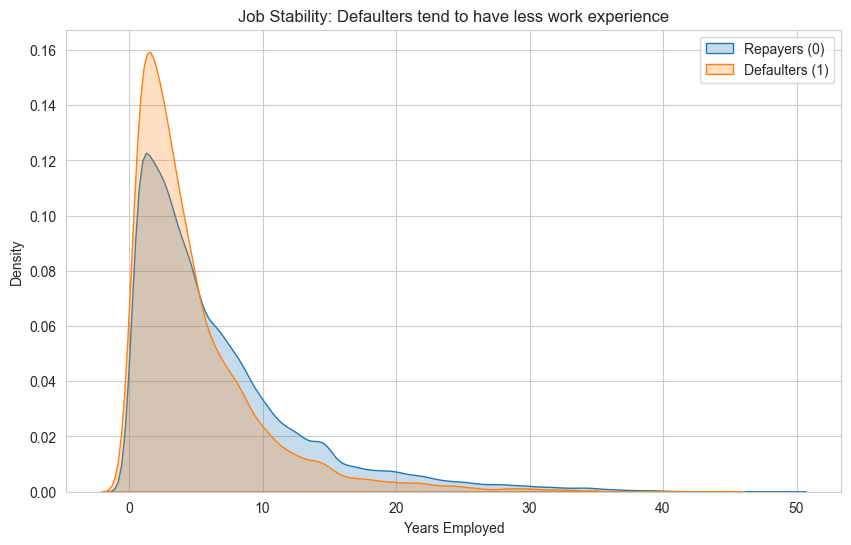

In [2]:
# FIX THE BUG
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)

# CREATE THE YEARS COLUMN
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] / -365

# VERIFY THE INSIGHT
print("Average Years Employed (Repayers):", round(df[df['TARGET'] == 0]['YEARS_EMPLOYED'].mean(), 2))
print("Average Years Employed (Defaulters):", round(df[df['TARGET'] == 1]['YEARS_EMPLOYED'].mean(), 2))

# PLOT THE GRAPH 
plt.figure(figsize=(10,6))
sns.kdeplot(df.loc[df['TARGET'] == 0, 'YEARS_EMPLOYED'], label='Repayers (0)', fill=True)
sns.kdeplot(df.loc[df['TARGET'] == 1, 'YEARS_EMPLOYED'], label='Defaulters (1)', fill=True)
plt.title('Job Stability: Defaulters tend to have less work experience')
plt.xlabel('Years Employed')
plt.legend()
plt.show()

In [3]:
# FEATURE: Credit-to-Income Ratio (How many years of salary would it take to pay off the loan?)
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

# Annuity-to-Income Ratio (What % of their monthly salary goes to paying this loan?)
df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

# Do these new features separate the groups?
print("Avg Credit/Income Ratio (Repayers):", round(df[df['TARGET'] == 0]['CREDIT_INCOME_RATIO'].mean(), 2))
print("Avg Credit/Income Ratio (Defaulters):", round(df[df['TARGET'] == 1]['CREDIT_INCOME_RATIO'].mean(), 2))

# IDENTIFY CATEGORICAL COLUMNS (The text data)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Number of Categorical Columns: {len(categorical_cols)}")
print("First 5 Categorical Columns:", categorical_cols[:5])

# CHECK CARDINALITY (How many unique values in each?) If a column has 100+ unique values, One-Hot Encoding will explode our memory!
print("\nUnique Values per Column:")
print(df[categorical_cols].nunique().sort_values(ascending=False).head(10))

Avg Credit/Income Ratio (Repayers): 3.96
Avg Credit/Income Ratio (Defaulters): 3.89
Number of Categorical Columns: 16
First 5 Categorical Columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE']

Unique Values per Column:
ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
dtype: int64


In [4]:
# ONE-HOT ENCODING, find EVERY text column and converts it into 0s and 1s
print("Original Shape:", df.shape)

df = pd.get_dummies(df, drop_first=True) # drop_first=True avoids multicollinearity (The Dummy Variable Trap)

print("New Shape (After Encoding):", df.shape)

# SANITY CHECK
print("\nNew Columns Example:")
print(df.columns[df.columns.str.contains('ORGANIZATION_TYPE')][:5])

Original Shape: (307511, 125)
New Shape (After Encoding): (307511, 233)

New Columns Example:
Index(['ORGANIZATION_TYPE_Agriculture', 'ORGANIZATION_TYPE_Bank',
       'ORGANIZATION_TYPE_Business Entity Type 1',
       'ORGANIZATION_TYPE_Business Entity Type 2',
       'ORGANIZATION_TYPE_Business Entity Type 3'],
      dtype='object')


In [5]:
from sklearn.model_selection import train_test_split

# SEPARATE FEATURES (X) FROM TARGET (y)
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# SPLIT THE DATA (80% Train, 20% Test) stratify=y enforces the 92/8 rule!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# VERIFY THE SPLIT
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")
print(f"Defaulter Rate in Train: {y_train.mean():.4f}")
print(f"Defaulter Rate in Test: {y_test.mean():.4f}")

Training Shape: (246008, 232)
Testing Shape: (61503, 232)
Defaulter Rate in Train: 0.0807
Defaulter Rate in Test: 0.0807


In [6]:
import re
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

print("Cleaning column names...")

# CLEAN THE COLUMN NAMES
X_train = X_train.rename(columns = lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))
X_test = X_test.rename(columns = lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))

print("Initializing the LightGBM Model...")

# BUILD THE MODEL
model = LGBMClassifier(
    n_estimators=100,          
    class_weight='balanced',   # Handle the 92/8 imbalance
    random_state=42,
    n_jobs=-1                  
)

# TRAIN THE MODEL 
print("Training the model on 80% of the data...")
model.fit(X_train, y_train)
print("Training Complete!")

# GRADE THE EXAM (Testing)
print("Grading the exam...")
y_pred_probs = model.predict_proba(X_test)[:, 1] 

# CALCULATE THE SCORE
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"\n--- RESULTS ---")
print(f"Model AUC-ROC Score: {auc_score:.4f}")

Cleaning column names...
Initializing the LightGBM Model...
Training the model on 80% of the data...
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.401931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12513
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training Complete!
Grading the exam...

--- RESULTS ---
Model AUC-ROC Score: 0.7598


<Figure size 1000x800 with 0 Axes>

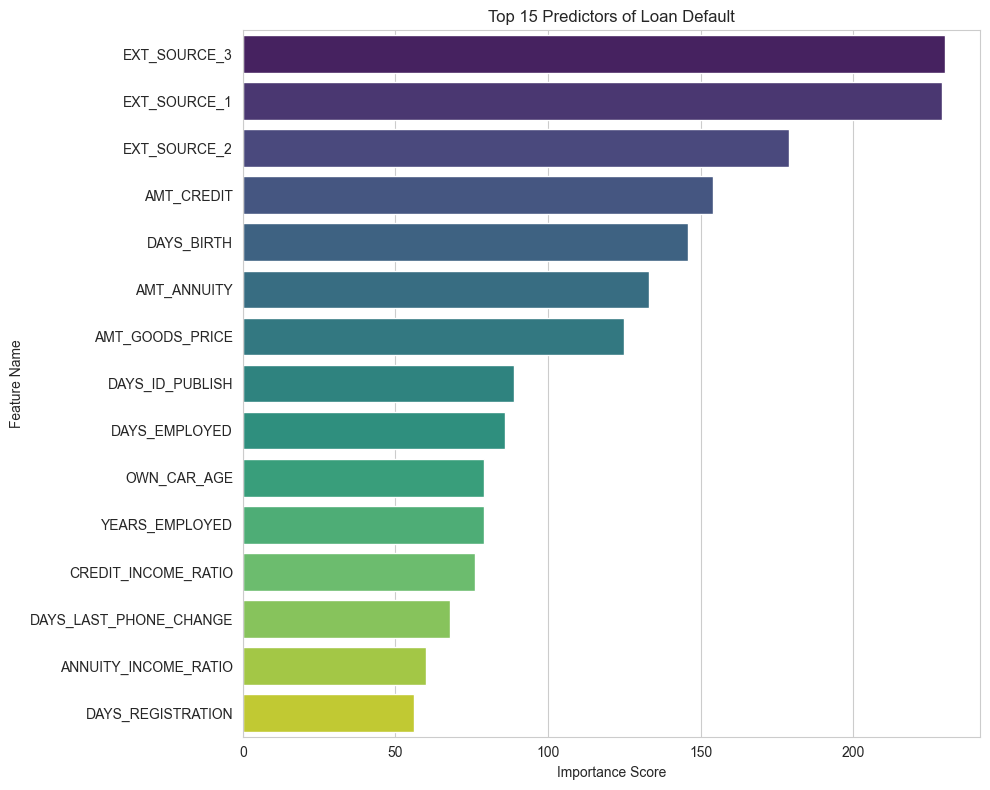

In [7]:
# EXTRACT FEATURE IMPORTANCE
feature_imp = pd.DataFrame({
    'Importance': model.feature_importances_,
    'Feature': X_train.columns
})

# SORT AND GET THE TOP 15
top_15_features = feature_imp.sort_values(by="Importance", ascending=False).head(15)

# PLOT THE RESULTS
plt.figure(figsize=(10, 8))
plt.figure(figsize=(10, 8))
sns.barplot(
    x="Importance", 
    y="Feature", 
    data=top_15_features, 
    palette="viridis",
    hue="Feature",
    legend=False
)
plt.title('Top 15 Predictors of Loan Default')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

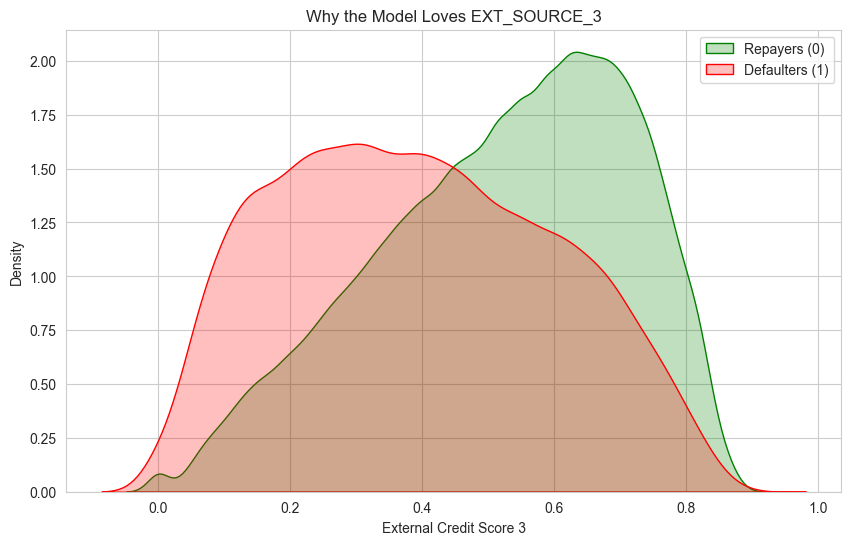

In [8]:
# PLOT THE MOST IMPORTANT FEATURE (EXT_SOURCE_3)
plt.figure(figsize=(10, 6))

# Plot Repayers(Target = 0)
sns.kdeplot(df.loc[df['TARGET'] == 0, 'EXT_SOURCE_3'], label='Repayers (0)', fill=True, color='green')

# Plot Defaulters(Target = 1)
sns.kdeplot(df.loc[df['TARGET'] == 1, 'EXT_SOURCE_3'], label='Defaulters (1)', fill=True, color='red')

plt.title('Why the Model Loves EXT_SOURCE_3')
plt.xlabel('External Credit Score 3')
plt.ylabel('Density')
plt.legend()
plt.show()

In [9]:
import numpy as np

# Translate raw probability into a 300-850 FICO-style credit score
def prob_to_credit_score(probability):
    min_score = 300
    max_score = 850
    score = min_score + ((1 - probability) * (max_score - min_score))
    return int(np.round(score))

# Select 5 random customers from the holdout set for testing
random_customers = X_test.sample(5, random_state=99)
customer_indices = random_customers.index

# Generate and print the credit score report
print("--- CUSTOMER CREDIT SCORE REPORT ---")
for i, idx in enumerate(customer_indices):
    prob = model.predict_proba(random_customers.iloc[[i]])[0][1]
    score = prob_to_credit_score(prob)
    
    actual_status = "Defaulter" if y_test.loc[idx] == 1 else "Repayer"
    
    print(f"Customer #{idx}:")
    print(f"  Risk Probability: {prob:.1%}")
    print(f"  Assigned Credit Score: {score}")
    print(f"  Actual Truth: {actual_status}\n")


    import joblib

# Serialize and save the LightGBM model to the local directory
joblib.dump(model, 'lightgbm_credit_model.joblib')

print("Model successfully saved to disk as 'lightgbm_credit_model.joblib'")

# Verify the file can be loaded back into memory
loaded_model = joblib.load('lightgbm_credit_model.joblib')

print("Model successfully loaded from disk.")

--- CUSTOMER CREDIT SCORE REPORT ---
Customer #279913:
  Risk Probability: 53.2%
  Assigned Credit Score: 558
  Actual Truth: Repayer

Customer #228918:
  Risk Probability: 13.1%
  Assigned Credit Score: 778
  Actual Truth: Repayer

Customer #243689:
  Risk Probability: 26.1%
  Assigned Credit Score: 707
  Actual Truth: Repayer

Customer #241886:
  Risk Probability: 44.7%
  Assigned Credit Score: 604
  Actual Truth: Repayer

Customer #79711:
  Risk Probability: 54.6%
  Assigned Credit Score: 550
  Actual Truth: Repayer

Model successfully saved to disk as 'lightgbm_credit_model.joblib'
Model successfully loaded from disk.


In [10]:
# Extract a single row to act as our baseline application template
base_profile = X_test.iloc[[0]].copy()

# Define the loan simulation engine
def simulate_loan_application(income, loan_amount, years_employed):
    new_applicant = base_profile.copy()
    
    # Inject the applicant's new financial data
    new_applicant['AMT_INCOME_TOTAL'] = income
    new_applicant['AMT_CREDIT'] = loan_amount
    new_applicant['YEARS_EMPLOYED'] = years_employed
    
    # Recalculate the custom risk features based on the new inputs
    new_applicant['CREDIT_INCOME_RATIO'] = loan_amount / income
    new_applicant['ANNUITY_INCOME_RATIO'] = new_applicant['AMT_ANNUITY'] / income
    
    # Generate the prediction using the saved model
    probability = loaded_model.predict_proba(new_applicant)[0][1]
    score = prob_to_credit_score(probability)
    
    return probability, score

# Simulate Profile A: Stable income, low debt, long employment
prob_safe, score_safe = simulate_loan_application(
    income=100000, 
    loan_amount=20000, 
    years_employed=10
)

# Simulate Profile B: Low income, massive debt, unstable employment
prob_risky, score_risky = simulate_loan_application(
    income=30000, 
    loan_amount=250000, 
    years_employed=0.5
)

# Output the decisions
print("--- LOAN APPLICATION DECISIONS ---")
print(f"Profile A (Stable)  -> Risk: {prob_safe:.1%} | Score: {score_safe}")
print(f"Profile B (Risky)   -> Risk: {prob_risky:.1%} | Score: {score_risky}")

--- LOAN APPLICATION DECISIONS ---
Profile A (Stable)  -> Risk: 21.9% | Score: 730
Profile B (Risky)   -> Risk: 46.2% | Score: 596


In [11]:
import joblib

# Isolate one single row from the test set to use as our 233-column template
base_profile = X_test.iloc[[0]].copy()

# Save the template to the project folder
joblib.dump(base_profile, 'base_profile.joblib')

['base_profile.joblib']